## To Know About data

In [31]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

#To Visualize
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('onlinedeliverydata.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [7]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [8]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [25]:
data = data.rename(columns = {'Marital Status' :'Status','Monthly Income':'Monthly_Income'})

### Age Analyse

In [61]:
age = data['Age']
print(age.unique())

[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]


In [14]:
#Create engine to change data frame to sql
engine = create_engine('sqlite://', echo=False)
data.to_sql('Delivery_Data',con=engine)

In [63]:
SQL_QUERY = engine.execute("SELECT Age,count(Age) FROM Delivery_Data GROUP BY Age").fetchall()
print(SQL_QUERY)

[(18, 1), (19, 4), (20, 9), (21, 23), (22, 57), (23, 73), (24, 50), (25, 52), (26, 35), (27, 21), (28, 15), (29, 14), (30, 9), (31, 8), (32, 16), (33, 1)]


In [64]:
age_data = pd.DataFrame(SQL_QUERY,columns = ['Age','Count'])

In [65]:
age_data.set_index('Age',inplace=True)

In [66]:
print(age_data)

     Count
Age       
18       1
19       4
20       9
21      23
22      57
23      73
24      50
25      52
26      35
27      21
28      15
29      14
30       9
31       8
32      16
33       1


<AxesSubplot:xlabel='Age'>

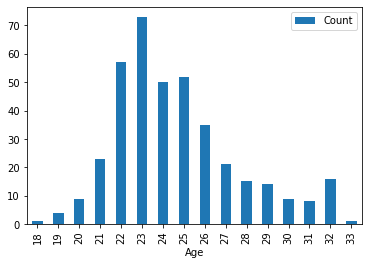

In [67]:
age_data.plot(kind = 'bar',)

### Gender Analyse

In [68]:
data.columns

Index(['Age', 'Gender', 'Status', 'Occupation', 'Monthly_Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating',

In [69]:
gender = data['Gender']
gender.unique()

array(['Female', 'Male'], dtype=object)

In [70]:
gender_query = engine.execute("SELECT Gender,count(Gender) FROM Delivery_Data GROUP BY Gender").fetchall()
gender_data = pd.DataFrame(gender_query,columns =['Gender','Count'])
gender_data

,Gender,Count
0,Female,166
1,Male,222


([<matplotlib.patches.Wedge at 0x21c616ef070>,
 [Text(0.24725331909968304, 1.07185157377045, 'Female'),
  Text(-0.26973089356329044, -1.1692926259314, 'Male')],
 [Text(0.13486544678164528, 0.5846463129656999, '42.78%'),
  Text(-0.15734302124525276, -0.68208736512665, '57.22%')])

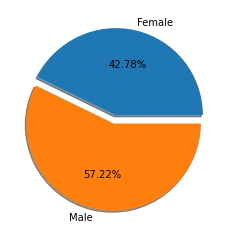

In [71]:
gData = gender_data['Count']
lbl = gender_data['Gender']
plt.pie(gData,labels = lbl,explode =[0,0.1],shadow = True,autopct = '%1.2f%%')

### Status Analyse

In [73]:
status = data['Status']
status.unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [74]:
status_query = engine.execute("SELECT Status,count(Status) FROM Delivery_Data GROUP BY Status").fetchall()
status_data = pd.DataFrame(status_query,columns =['Status','Count'])
status_data

,Status,Count
0,Married,108
1,Prefer not to say,12
2,Single,268


([<matplotlib.patches.Wedge at 0x21c61534bb0>,
 [Text(0.7696899017681924, 0.920639698859478, 'Married'),
  Text(-0.3533789899830969, 1.2510488757193008, 'Prefer not to say'),
  Text(-0.620352860957637, -0.908384460403014, 'Single')],
 [Text(0.44898577603144557, 0.5370398243346954, '27.84%'),
  Text(-0.21746399383575193, 0.7698762312118774, '3.09%'),
  Text(-0.33837428779507467, -0.4954824329470985, '69.07%')])

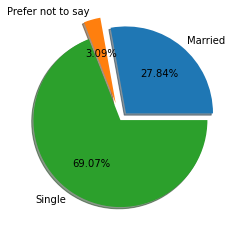

In [86]:
sData = status_data['Count']
lbl = status_data['Status']
plt.pie(sData,labels = lbl,shadow = True,autopct = '%1.2f%%', explode = [0.1,0.2,0])

### Analyse By Occupation

In [88]:
occupation = data['Occupation']
occupation.unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [89]:
occup_query = engine.execute("SELECT Occupation,count(Occupation) FROM Delivery_Data GROUP BY Occupation").fetchall()
occup_data = pd.DataFrame(occup_query,columns =['Occupation','Count'])
occup_data

,Occupation,Count
0,Employee,118
1,House wife,9
2,Self Employeed,54
3,Student,207


Text(0, 0.5, 'LifeExp')

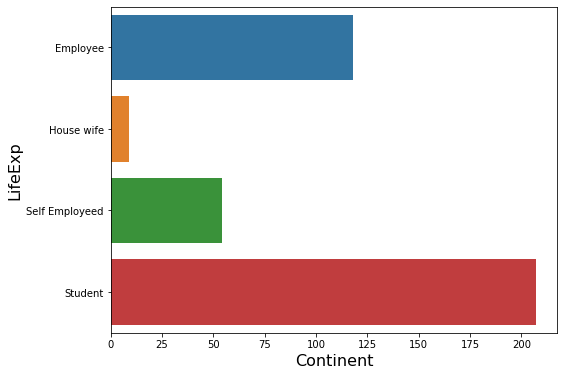

In [97]:
plt.figure(figsize=(10, 7))
splot=sns.barplot(x="Count",y="Occupation",data=occup_data)
plt.xlabel("Continent", size=16)
plt.ylabel("LifeExp", size=16)

### Analyse By Income

In [12]:
status = data['Monthly_Income']
status.unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [17]:
income_query = engine.execute("SELECT Monthly_Income,count(Monthly_Income) FROM Delivery_Data GROUP BY Monthly_Income").fetchall()
income_data = pd.DataFrame(income_query,columns = ['Range Income','Number of Customers'])
income_data

,Range Income,Number of Customers
0,10001 to 25000,45
1,25001 to 50000,69
2,Below Rs.10000,25
3,More than 50000,62
4,No Income,187


<BarContainer object of 5 artists>

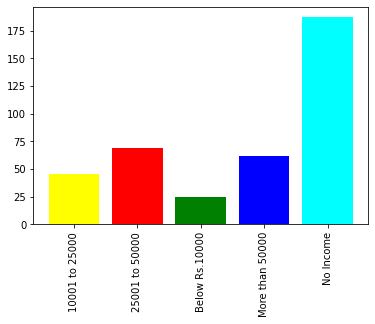

In [37]:
x = income_data['Range Income']
y = income_data['Number of Customers']
plt.xticks(rotation =90)
plt.bar(x ,y ,color=['yellow', 'red', 'green', 'blue', 'cyan'])

### Analysis by Table

In [21]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [28]:
delivery_data_pivot1=pd.pivot_table(data,index=["Age","Status"],
                               values=['Gender','Family size'],
                               aggfunc=[np.mean,len], margins=True)

#Adding color gradient 
cm = sns.light_palette("red", as_cmap=True)
delivery_data_pivot1.style.background_gradient(cmap=cm)

In [46]:
data.corr()

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.169982,0.006595,0.047500,0.137294
Family size,0.169982,1.000000,-0.053537,0.070126,-0.009402
latitude,0.006595,-0.053537,1.000000,-0.144234,-0.201813
longitude,0.047500,0.070126,-0.144234,1.000000,0.156119
Pin code,0.137294,-0.009402,-0.201813,0.156119,1.000000


In [13]:
delivery_data_pivot2=pd.pivot_table(data,index=["Order Time","Maximum wait time"],
                               values=['Age','Family size'],columns=['Influence of time'],
                               aggfunc={'Influence of time':len},
                               fill_value=0)

#Adding color gradient
cm = sns.light_palette("orange", as_cmap=True)
delivery_data_pivot2.style.background_gradient(cmap=cm)

In [20]:
#Waiting for further anlysis,prediction model
#But now thank, enjoy yourself :)